### Imports

In [426]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg


from datetime import date
from datetime import timedelta

import plotly.express as px
import plotly.graph_objs as go 

### Dataset

In [427]:
forex = "EURUSD=X"

In [428]:
# set the start and end date for the historical data
start_date = '2004-01-01'
end_date = date.today().strftime("%Y-%m-%d")

In [429]:
yf.pdr_override() # <== that's all it takes :-)

In [430]:
# download dataframe
df = pdr.get_data_yahoo(forex, start=start_date, end=end_date, interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [431]:
# save the data to a CSV file
path = "data/" + forex + ".csv"
df.to_csv(path, index=True)

In [432]:
df = pd.read_csv("data/EURUSD=X.csv", index_col = "Date")
df.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [433]:
df.tail()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-04-19  1.097538  1.098660  1.091834  1.097538   1.097538       0
2023-04-20  1.095218  1.098901  1.093434  1.095218   1.095218       0
2023-04-21  1.097093  1.099251  1.093972  1.097093   1.097093       0
2023-04-24  1.099227  1.103424  1.096876  1.099227   1.099227       0
2023-04-25  1.105950  1.106807  1.096924  1.105950   1.105950       0

In [434]:
df.describe()

Open         High          Low        Close    Adj Close  Volume
count  5010.000000  5010.000000  5010.000000  5010.000000  5010.000000  5010.0
mean      1.242199     1.246858     1.237090     1.242211     1.242211     0.0
std       0.125898     0.126593     0.126340     0.125892     0.125892     0.0
min       0.959619     0.967006     0.072902     0.959619     0.959619     0.0
25%       1.132387     1.136018     1.128873     1.132416     1.132416     0.0
50%       1.230792     1.235063     1.225896     1.230800     1.230800     0.0
75%       1.334165     1.338245     1.328564     1.334072     1.334072     0.0
max       1.598184     1.602821     1.587402     1.598798     1.598798     0.0

In [435]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Basic Visualization

In [436]:
columns = ["Open", "High", "Low", "Close", "Adj Close"]
for col in columns:
    title = "Line chart of " + col
    fig = px.line(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [437]:
for col in columns:
    title = "Area chart of " + col
    fig = px.area(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [438]:
# for col in columns:
#     title = "Histogram of " + col
#     fig = px.histogram(df, x=df.index, y=col, title = title)
#     fig.update_traces(xbins_size="M12")
#     fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12", tickformat="%b\n%Y")
#     fig.update_layout(bargap=0.5)
#     fig.show()

In [439]:
# result = seasonal_decompose(df['Open'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

In [440]:
# result = seasonal_decompose(df['Close'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

[1.         0.99696971 0.99516641 0.99353664 0.99185162 0.99014062
 0.98843897 0.98688061 0.98505097 0.98304396 0.98124726 0.97944799
 0.9775797  0.97567364 0.97388986 0.97205836 0.9701194  0.96823578
 0.96626804 0.96441022 0.96240839 0.96050932 0.9587861  0.9570524
 0.9549765  0.95302128 0.95117883 0.94934629 0.94743653 0.94552189
 0.94344031 0.941456   0.93972758 0.93783942 0.93588989 0.9340723
 0.93224874]


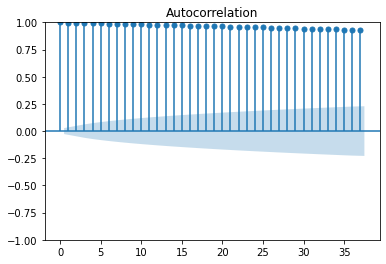

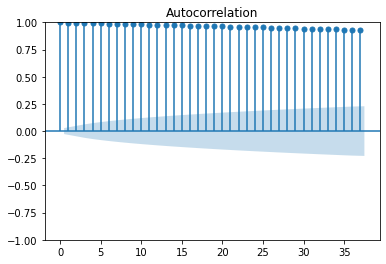

In [441]:
acf_values = acf(df['Close'])
print(acf_values)
plot_acf(df['Close'])

[ 1.00000000e+00  9.97168748e-01  2.15461403e-01  8.04277389e-02
  1.49617013e-02 -1.83297884e-03 -9.22242743e-04  2.56501093e-02
 -3.90099711e-02 -5.20530685e-02  1.32115719e-02  6.40138686e-03
 -8.37182421e-03 -1.19212177e-02  1.41484977e-02 -1.17102228e-03
 -1.61098885e-02 -5.15955609e-04 -1.96073396e-02  1.35121886e-02
 -1.90777415e-02  7.65188368e-03  3.41734754e-02  1.80396327e-02
 -5.72184933e-02 -5.89901463e-03  1.64263803e-02  1.25653586e-02
 -7.62036955e-03 -1.23248084e-02 -4.10813198e-02  7.98138409e-03
  5.60232413e-02 -1.22359058e-02 -2.02951923e-02  1.89792975e-02
  7.09489880e-03]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



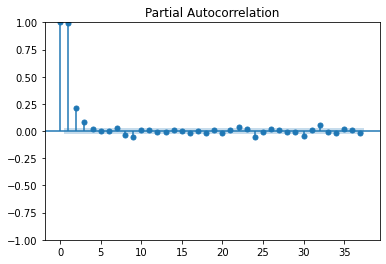

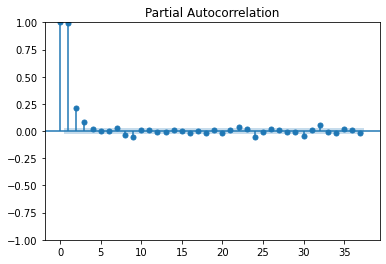

In [442]:
pacf_values = pacf(df['Close'])
print(pacf_values)
plot_pacf(df['Close'])

[1.         0.99700207 0.99515638 0.99341387 0.99171076 0.99006615
 0.98843584 0.98673918 0.98508648 0.98309199 0.98117294 0.97933876
 0.97747713 0.97567052 0.97380549 0.97194458 0.97017377 0.96820624
 0.9662182  0.96429064 0.96248437 0.96043948 0.95873804 0.95694794
 0.95493341 0.9529949  0.95120035 0.94946361 0.94746324 0.94550094
 0.94358694 0.94169902 0.93973438 0.93790053 0.93611289 0.93421111
 0.93233842]


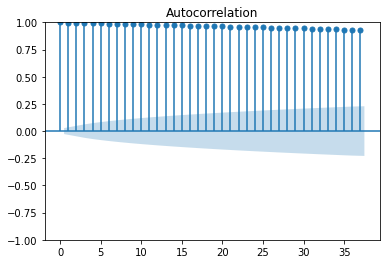

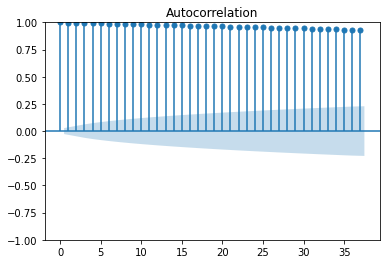

In [443]:
acf_values = acf(df['Open'])
print(acf_values)
plot_acf(df['Open'])

[ 1.00000000e+00  9.97201115e-01  2.04606618e-01  6.24640141e-02
  2.43356441e-02  1.84492376e-02  9.45989446e-03 -9.13556267e-03
  3.62997302e-03 -6.30160716e-02 -1.44231208e-02  9.17414200e-03
 -2.12635511e-03  7.82063112e-03 -8.07654650e-03 -1.53859248e-03
  1.56054237e-02 -2.72704958e-02 -1.78337976e-02  1.15240800e-03
  2.38778065e-02 -3.67973473e-02  4.88335550e-02  5.50762380e-03
 -4.28719760e-02 -7.36043654e-04  2.75247346e-02  2.04234714e-02
 -4.65825714e-02 -8.52342733e-03  3.89334178e-04  5.72570156e-03
 -8.36511879e-03  1.71291656e-02  1.58462883e-02 -1.78642848e-02
  1.20195119e-03]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



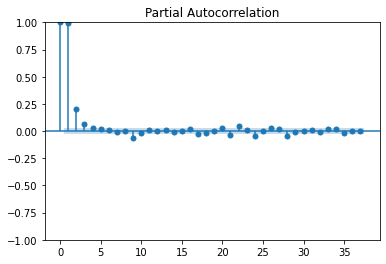

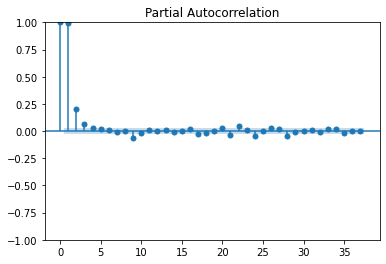

In [444]:
pacf_values = pacf(df['Open'])
print(pacf_values)
plot_pacf(df['Open'])

### Preprocessing (Close)

In [445]:
# change filter value for open
df_close = df.filter(['Close'])

# change df_close to open for open
# also ctrl+f and change close to open everywhere for open
close_dataset = df_close.values

train_close_len = math.ceil(len(close_dataset) * 0.8)
test_close_len = len(close_dataset) - train_close_len
print("Training length is: ", train_close_len)
print("Testing length is: ", test_close_len)

Training length is:  4008
Testing length is:  1002


In [446]:
# # Creating the training/testing data

train_data_close = pd.DataFrame(df['Close'][0:math.ceil(len(close_dataset)*0.80)])
test_data_close = pd.DataFrame(df['Close'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

print("Training length is: ", train_data_close.shape)
print("Testing length is: ", test_data_close.shape)


Training length is:  (4008, 1)
Testing length is:  (1002, 1)


In [447]:
# Scaling training data

scaler = MinMaxScaler(feature_range=(0,1))
train_scaled_close_data = scaler.fit_transform(train_data_close)
train_scaled_close_data

array([[0.39150771],
       [0.39150771],
       [0.41027237],
       ...,
       [0.14430265],
       [0.15149737],
       [0.16170283]])

In [448]:
scaler = MinMaxScaler(feature_range=(0,1))
test_scaled_close_data = scaler.fit_transform(test_data_close)
test_scaled_close_data

array([[0.65157997],
       [0.65725355],
       [0.64620388],
       ...,
       [0.50082971],
       [0.5086057 ],
       [0.53309754]])

### Models

#### Some functions

In [449]:
# Metrics
def metrics(test, predictions):
    mse = mean_squared_error(test, predictions, squared = True)
    rmse = math.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)

In [450]:
def pred_plot(test, pred):
    plt.plot(test)
    plt.plot(pred, color='red')
    plt.show()

#### Auto Regressive

In [451]:
ar_model = AutoReg(train_scaled_close_data, lags = 1002)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [ 3.96142072e-04  7.18482693e-01  1.73119643e-01 ... -7.29601742e-03
  1.17119207e-02  1.56208118e-02]


In [452]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.152630, expected=0.651580
predicted=0.161115, expected=0.657254
predicted=0.157625, expected=0.646204
predicted=0.163357, expected=0.647947
predicted=0.169558, expected=0.647287
predicted=0.178535, expected=0.644368
predicted=0.189326, expected=0.616141
predicted=0.196371, expected=0.618184
predicted=0.200849, expected=0.616326
predicted=0.200965, expected=0.615537
predicted=0.197353, expected=0.594257
predicted=0.197010, expected=0.590128
predicted=0.194698, expected=0.587288
predicted=0.199758, expected=0.605724
predicted=0.203580, expected=0.603370
predicted=0.206029, expected=0.610532
predicted=0.200920, expected=0.606786
predicted=0.213514, expected=0.588754
predicted=0.211142, expected=0.595083
predicted=0.214855, expected=0.606694
predicted=0.221013, expected=0.590953
predicted=0.218918, expected=0.586511
predicted=0.211409, expected=0.566525
predicted=0.220232, expected=0.563311
predicted=0.216368, expected=0.564668
predicted=0.218226, expected=0.559561
predicted=0.

In [453]:
metrics(test_scaled_close_data, predictions)

MSE: 0.19152696989204854
RMSE: 0.43763794384405075
MAE: 0.38996184260138367


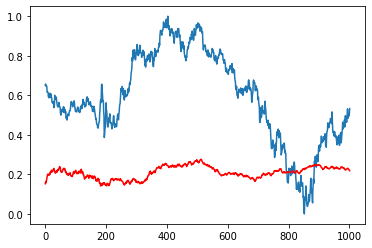

In [454]:
pred_plot(test_scaled_close_data, predictions)

In [455]:
ar_model = AutoReg(train_scaled_close_data, lags = 30)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [ 0.00105658  0.74654823  0.16494745  0.07278955  0.01627705 -0.00236064
 -0.00373029  0.06572282 -0.01289681 -0.06637379  0.01229734  0.01338431
 -0.00520964 -0.01965403  0.01996584  0.0094073  -0.01565083  0.02326601
 -0.03080873  0.02894394 -0.03134874 -0.02316283  0.02774442  0.06441943
 -0.06068176 -0.02221689  0.00662355  0.02199087  0.01554307  0.02629108
 -0.04479539]


In [456]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.159014, expected=0.651580
predicted=0.158886, expected=0.657254
predicted=0.159029, expected=0.646204
predicted=0.159784, expected=0.647947
predicted=0.160019, expected=0.647287
predicted=0.160364, expected=0.644368
predicted=0.161414, expected=0.616141
predicted=0.161590, expected=0.618184
predicted=0.162746, expected=0.616326
predicted=0.164231, expected=0.615537
predicted=0.163615, expected=0.594257
predicted=0.162886, expected=0.590128
predicted=0.163081, expected=0.587288
predicted=0.164713, expected=0.605724
predicted=0.165382, expected=0.603370
predicted=0.166523, expected=0.610532
predicted=0.166872, expected=0.606786
predicted=0.167194, expected=0.588754
predicted=0.167872, expected=0.595083
predicted=0.168510, expected=0.606694
predicted=0.168744, expected=0.590953
predicted=0.169940, expected=0.586511
predicted=0.170599, expected=0.566525
predicted=0.170413, expected=0.563311
predicted=0.170116, expected=0.564668
predicted=0.170740, expected=0.559561
predicted=0.

In [457]:
metrics(test_scaled_close_data, predictions)

MSE: 0.14273248508349431
RMSE: 0.3777995302849043
MAE: 0.32983132435041485


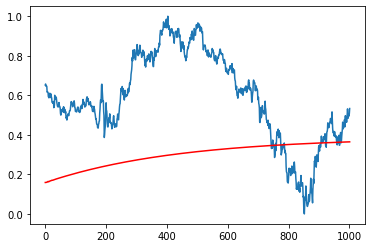

In [458]:
pred_plot(test_scaled_close_data, predictions)

#### Moving Average

In [459]:
df_ma = df_close.copy()

df_ma['MA50'] = df_ma['Close'].rolling(50).mean()
df_ma['MA100'] = df_ma['Close'].rolling(100).mean()
df_ma['MA200'] = df_ma['Close'].rolling(200).mean()

In [460]:
from plotly.offline import iplot 

fig = go.Figure(data=[go.Scatter(x=df_ma.index,
                                 y=df_ma["Close"], 
                                 line = dict(color = "blue"), name="Close"), 
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA50"], 
                                 line=dict(color='orange', width=2), name="MA50"),
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA100"], 
                                 line=dict(color='green', width=2), name="MA100"),
                     go.Scatter(x=df_ma.index,
                                 y=df_ma["MA200"], 
                                 line=dict(color='magenta', width=2), name="MA200")])

fig.update_layout(
    plot_bgcolor = "white",
    title_text="Close Price and its moving average for Europe Exchange"
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black",
                title_text="<b>Close and Moving Average</b>")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black", 
                 title_text="<b>Date</b>")



iplot(fig)

In [461]:
df_ma_copy = df_ma.copy()

df_ma_copy.dropna(inplace = True)

In [462]:
metrics(df_ma_copy['Close'], df_ma_copy['MA50'])

MSE: 0.0009039904953000831
RMSE: 0.0300664346955219
MAE: 0.022175407591046473


In [463]:
metrics(df_ma_copy['Close'], df_ma_copy['MA100'])

MSE: 0.0018617139984632833
RMSE: 0.04314758392382224
MAE: 0.032055120460210536


In [464]:
metrics(df_ma_copy['Close'], df_ma_copy['MA200'])

MSE: 0.003932772537681334
RMSE: 0.06271182135515865
MAE: 0.04958013500779019
